# SPAM E-MAILS CLASSIFIER USING NAIVE BAYES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df = pd.read_csv('emails.csv')

In [3]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Visualizing the Data

In [6]:
ham = spam_df[spam_df['spam'] == 0]

In [7]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
spam = spam_df[spam_df['spam'] == 1]

In [9]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [10]:
print("spam pertcent : ", (len(spam) / len(spam_df) * 100))
print("ham pertcent : ", (len(ham) / len(spam_df) * 100))

spam pertcent :  23.88268156424581
ham pertcent :  76.11731843575419


In [12]:
spam_df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

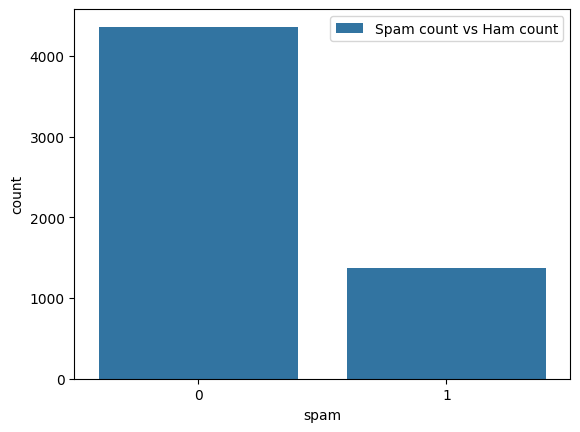

In [15]:
sns.countplot(x = spam_df['spam'], label = "Spam count vs Ham count")

# Count Vectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [26]:
print(vectorizer.get_params())   

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [22]:
spamham_countvectorizer.shape

(5728, 37303)

# Training the Model

In [27]:
label = spam_df['spam'].values

In [28]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [29]:
testing_sample = ['Free money!!!', 'Hi Kim, Please let me know if you need any further information. Thanks']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [30]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [31]:
testing_sample2 = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample2)

In [32]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1])

Training and Testing sets

In [33]:
X = spamham_countvectorizer
y = label

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Evaluating

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 1, 0, ..., 0, 0, 0])

<Axes: >

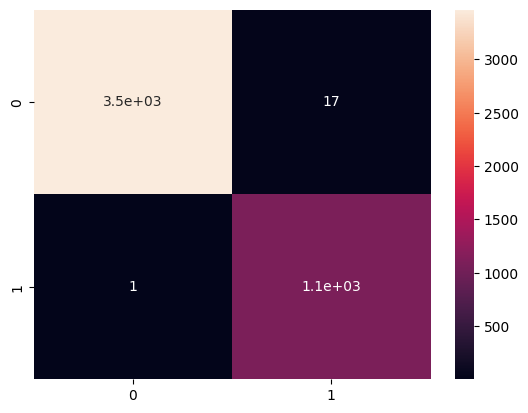

In [38]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

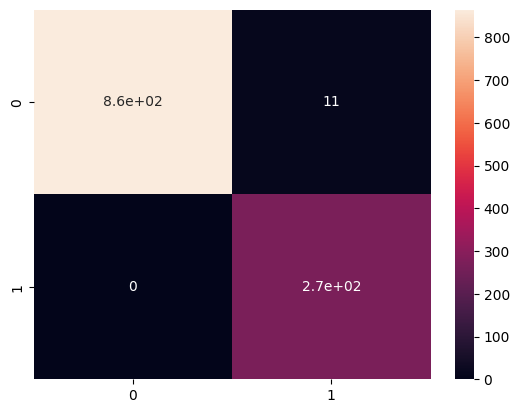

In [39]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       876
           1       0.96      1.00      0.98       270

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

